# Welcome to Full Stack Machine Learning's Week 1 Project!

Welcome to an exhilarating journey into the world of machine learning! This week, you're stepping into the shoes of a data scientist at ModaMetric, an eCommerce startup specializing in bespoke women's fashion. 

## The ModaMetric Journey

ModaMetric is a budding star in the eCommerce landscape, gaining rapid popularity among customers for its unique and stylish fashion offerings. However, they've faced a bottleneck: understanding their customers' sentiments from the ocean of reviews and feedback they receive daily. Your role as a member of ModaMetric's data science team is pivotal in solving this issue. Your mission? To implement an effective sentiment analysis model that can sift through the plethora of customer reviews and provide actionable insights.

## Your Role: A Pioneer Data Scientist at ModaMetric

As ModaMetric's newly onboarded data scientist, you're entrusted with an exciting challenge. The data science team, still in its infancy, has primarily focused on metrics and analytics that provide surface-level insights. They've yet to delve into the rich, unstructured data residing in customer reviews. And that's where you step in. Your job is to design and implement a machine learning pipeline using Metaflow capable of performing sentiment analysis on the customer reviews.
 

### Using GitHub

To complete the assignment:
1. Fill in the TODO sections of this notebook.
2. Push the results to your `full-stack-ml-metaflow-corise-week-1` repository.
3. Create a link to the repository in Corise.


## Task 1. EDA

You're starting with a [Women's Ecommerce Clothing Reviews Dataset from Kaggle](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews). This dataset closely mirrors the data that ModaMetric gathers. Your first task involves understanding the structure, variables, and potential quirks of this dataset. Remember, knowing your data is the first step in any data science project!

Exploratory Data Analysis (EDA) is a critical step in the data science pipeline as it allows us to gain insights and identify patterns within the data. In this section, we will be performing EDA on the Women's Clothing E-Commerce dataset, which contains reviews written by customers. Through this process, we will be looking out for trends, anomalies, and outliers that can help us better understand the data and inform our decision-making in subsequent stages of the project. By performing EDA, we will be able to identify potential issues with the dataset and make necessary corrections before proceeding to the model building phase.

Suggestion: Spend 1-2 hours on this section.

### Import Dependencies
You can change these if you wish! 
These packages are already installed in the `full-stack-metaflow-corise` environment. 
If you are feeling adventurous, you can install other packages you want in the conda environment too, or even make your own environment from scratch and include with your submission! 

In [1]:
from collections import Counter
import pandas as pd
import numpy as np
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

### Configure plots
This part is optional styling your plots and cards.

In [2]:
YELLOW = "#FFBC00"
GREEN = "#37795D"
PURPLE = "#5460C0"
BACKGROUND = "#F4EBE6"
colors = [GREEN, PURPLE]
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.facecolor": BACKGROUND,
    "figure.facecolor": BACKGROUND,
    "figure.figsize": (8, 8),
}
sns_palette = sns.color_palette(colors, len(colors))
sns.set_theme(style="ticks", rc=custom_params)

### Load the data 

In [4]:
# TODO: Load the dataset, ensure to use index_col=0 when reading the CSV file.
# Hints
# Look in the ../../data directory of this worksapce.
# If you use pandas think about the index_col arg 🧐
path = "../data/Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(path, index_col=0)

# light data cleaning
df.columns = ["_".join(name.lower().strip().split()) for name in df.columns]
df["review_text"] = df["review_text"].astype("str")

In [5]:
print(df.shape)
display(df.info())
df.head(2)


(23486, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   clothing_id              23486 non-null  int64 
 1   age                      23486 non-null  int64 
 2   title                    19676 non-null  object
 3   review_text              23486 non-null  object
 4   rating                   23486 non-null  int64 
 5   recommended_ind          23486 non-null  int64 
 6   positive_feedback_count  23486 non-null  int64 
 7   division_name            23472 non-null  object
 8   department_name          23472 non-null  object
 9   class_name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


None

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [16]:
df.head(5)

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.describe()

,clothing_id,age,rating,recommended_ind,positive_feedback_count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


### Plot the distribution of [1, 5] ratings

We will be using the `rating` to create a label on this dataset. We can see that the mean rating is above 4, pretty happy customers!

Let's try to visualise the distrbution of the label. 

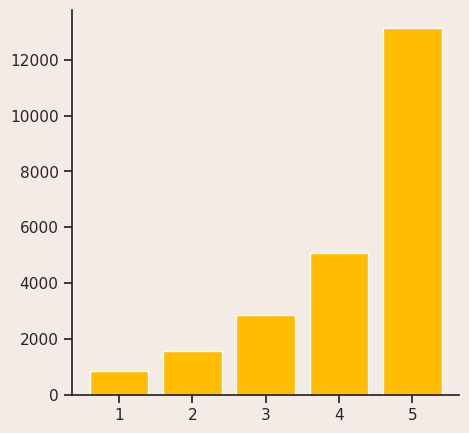

In [15]:

# rating_distribution = df.groupby('rating')['rating'].count()
rating_distribution = df['rating'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# You can swap the color used with the defined constants at the top of the notebook
ax.bar(x=rating_distribution.index, height=rating_distribution.values, color=YELLOW)
plt.show()

In [17]:
def labeling_function(row) -> int:
    """
    A function to derive labels from the user's review data.
    This could use many variables, or just one.
    In supervised learning scenarios, this is a very important part of determining what the machine learns!

    A subset of variables in the e-commerce fashion review dataset to consider for labels you could use in ML tasks include:
        # rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
        # recommended_ind: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
        # positive_feedback_count: Positive Integer documenting the number of other customers who found this review positive.

    In this case, we are doing sentiment analysis.
    To keep things simple, we use the rating only, and return a binary positive or negative sentiment score based on an arbitrarty cutoff.
    """
    # TODO: Add your logic for the labelling function here
    # It is up to you on what value to choose as the cut off point for the postive class
    # A good value to start would be 4
    # This function should return either a 0 or 1 depending on the rating of a particular row
    return 1 if row['rating'] >= 4 else 0


# final features and labels
_has_review_df = df[df["review_text"] != "nan"]
reviews = _has_review_df["review_text"]   # review text
labels = _has_review_df.apply(labeling_function, axis=1)  # 0 or 1
has_review_df = pd.DataFrame({"label": labels, **_has_review_df})
del _has_review_df

# a few checks
assert (
    labels.shape == reviews.shape
), "Labels and reviews should be equal shape vectors!"
assert (
    not sum([1 if r == "nan" else 0 for r in reviews]) > 0
), "There are `nan` values in the feature set!"

In [20]:
has_review_df[['review_text', 'label']].head()

,review_text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


#### What percentage of points does your algorithm label with positive sentiment?

In [21]:
pct_positive_sentiment = labels.sum() / labels.shape[0]
print(f"{round(100*pct_positive_sentiment,3)}% of the labels have positive sentiment.")

77.064% of the labels have positive sentiment.


### Let us try to visualise the data that we just labeled depending on the rating. 

In a real world project, iterating at this point is crucial. You need to look through the way your data is labeled, and ensure it is aligned with your intuitive understanding and objectives of the algorithm. There are also automated tools to aid your label cleaning operations, such as [Cleanlab](https://github.com/cleanlab/cleanlab).  

In [ ]:
# params
positive_color = "green"
negative_color = "red"
N = 10

# fetch subset of data
idxs = np.random.choice(reviews.index, 10, replace=False)
_labels_subset = labels[idxs]
_reviews_subset = reviews[idxs]

# print each sample and color the text by sentiment
for label, review in zip(_labels_subset, _reviews_subset):
    color = negative_color if label == 0 else positive_color
    print(colored(review, color), end="\n\n")

# in a real world project, iterating at this point is crucial.
# you need to look through the way your data is labeled, and ensure it is aligned with your intuitive understanding and objectives of the algorithm.
# there are also automated tools to aid your label cleaning operations, such as: https://github.com/cleanlab/cleanlab

### What do you think about the text and their corresponding labels? 
- Do you think the labels fit the text? 
- If not what do you think we can do to fix it?

### Filtering Stop Words
In this part we will be filtering the stop words from the reviews. We remove stopwords in NLP datasets because there are words that do not carry much meaning on their own, and their presence can add noise to the analysis. These words are common and frequently occurring words such as "a", "an", "the", "of", and "and". 

Removing stopwords can improve the accuracy and efficiency of natural language processing tasks, such as sentiment analysis or topic modeling, by reducing the dimensionality of the data and increasing the signal-to-noise ratio. By removing these uninformative words, the resulting dataset may contain more meaningful information that can be used for analysis.

In [ ]:
nltk.download("stopwords")
stopwords = list(nltk.corpus.stopwords.words("english"))
non_stopwords = []
for review in reviews:
    for word in review.split():
        word = word.translate(str.maketrans("", "", string.punctuation))
        if word == "":
            continue
        if not word.lower() in stopwords:
            non_stopwords.append(word)

### Find the K most common words

In [ ]:
K = 25
words, counts = zip(*Counter(non_stopwords).most_common(K))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.xticks(rotation=55)
ax.bar(x=words, height=counts, color=GREEN)

### What do the other features in the data look like?

In [ ]:
sns.pairplot(data=has_review_df, hue="label", corner=True, palette=sns_palette)

## Task 2: Scoping Out a Machine Learning Project

As ModaMetric's newly onboarded data scientist, you're entrusted with an exciting challenge. The data science team, still in its infancy, has primarily focused on metrics and analytics that provide surface-level insights. They've yet to delve into the rich, unstructured data residing in customer reviews. And that's where you step in. Your job is to design and implement a machine learning pipeline using Metaflow capable of performing sentiment analysis on the customer reviews.

As a Data Scientist, you know that a successful project requires not only technical skills but also effective project management. In this task, you will take on the role of a Data Scientist tasked with leading the development of a sentiment analysis classifier. You will be responsible for planning and executing the project, ensuring that it aligns with business goals, stays within scope, and delivers value to stakeholders.

To do this, you will create a one-page document that outlines the business value of the project, its scope, how to measure and monitor success, and when to quit. This task is designed to challenge you to think holistically about the project, and to consider not only the technical details but also the broader context in which the project is situated. Good luck!

Suggestion: Spend 1-2 hours on this section.

Fill in the section below with your answers!

### 1. The business value

### 2. The scope

### 3. How to measure success

### 4. How to monitor success

### Great job completing Task 2! 

Why do you think it is important to create a one-page document prior to beginning work on the project?

## Task 3: Baseline Machine Learning Flow

Finally, you'll develop a baseline model. This initial model, while simple, is crucial as it provides a benchmark for later, more complex models. You'll process the data, implement a basic machine learning algorithm, and evaluate its performance.

Throughout this journey, you're not just a data scientist - you're a trailblazer helping ModaMetric navigate the seas of unstructured data. Ready to dive in? 

A basic baseline in a machine learning model is the simplest possible model that can be used to make predictions on the dataset. The basic baseline can be as simple as predicting the most frequent class for a classification problem or the mean value of the target variable for a regression problem. The purpose of establishing a baseline is to provide a benchmark for evaluating the performance of more complex models. A model that cannot outperform the basic baseline is considered to be useless and should not be used in practice.

Here you will need to convert the code from above that was used to perform preprocessing and EDA on the dataset and create a Flow to run in order to train a baseline model. 

**NOTE:** It is important to realise that this is being run as a separate file and therefore re-using functions from above will not work. 

Suggestion: Spend 2-4 hours on this section. Rememeber that the more organized your earlier work is, the easier it is to write flows!

In [ ]:
%%writefile baseline_flow.py
from metaflow import (
    FlowSpec,
    step,
    Flow,
    current,
    Parameter,
    IncludeFile,
    card,
    current,
)
from metaflow.cards import Table, Markdown, Artifact

# TODO move your labeling function from earlier in the notebook here
labeling_function = lambda row: 0


class BaselineNLPFlow(FlowSpec):
    # We can define input parameters to a Flow using Parameters
    # More info can be found here https://docs.metaflow.org/metaflow/basics#how-to-define-parameters-for-flows
    split_size = Parameter("split-sz", default=0.2)
    # In order to use a file as an input parameter for a particular Flow we can use IncludeFile
    # More information can be found here https://docs.metaflow.org/api/flowspec#includefile
    data = IncludeFile("data", default="../data/Womens Clothing E-Commerce Reviews.csv")

    @step
    def start(self):
        # Step-level dependencies are loaded within a Step, instead of loading them
        # from the top of the file. This helps us isolate dependencies in a tight scope.
        import pandas as pd
        import io
        from sklearn.model_selection import train_test_split

        # load dataset packaged with the flow.
        # this technique is convenient when working with small datasets that need to move to remove tasks.
        df = pd.read_csv(io.StringIO(self.data))

        # filter down to reviews and labels
        df.columns = ["_".join(name.lower().strip().split()) for name in df.columns]
        df["review_text"] = df["review_text"].astype("str")
        _has_review_df = df[df["review_text"] != "nan"]
        reviews = _has_review_df["review_text"]
        labels = _has_review_df.apply(labeling_function, axis=1)
        # Storing the Dataframe as an instance variable of the class
        # allows us to share it across all Steps
        # self.df is referred to as a Data Artifact now
        # You can read more about it here https://docs.metaflow.org/metaflow/basics#artifacts
        self.df = pd.DataFrame({"label": labels, **_has_review_df})
        del df
        del _has_review_df

        # split the data 80/20, or by using the flow's split-sz CLI argument
        _df = pd.DataFrame({"review": reviews, "label": labels})
        self.traindf, self.valdf = train_test_split(_df, test_size=self.split_size)
        print(f"num of rows in train set: {self.traindf.shape[0]}")
        print(f"num of rows in validation set: {self.valdf.shape[0]}")

        self.next(self.baseline)

    @step
    def baseline(self):
        "Compute the baseline"

        ### TODO: Fit and score a baseline model on the data, log the acc and rocauc as artifacts.
        self.base_acc = 0.0
        self.base_rocauc = 0.0

        self.next(self.end)

    @card(
        type="corise"
    )  # TODO: after you get the flow working, chain link on the left side nav to open your card!
    @step
    def end(self):
        msg = "Baseline Accuracy: {}\nBaseline AUC: {}"
        print(msg.format(round(self.base_acc, 3), round(self.base_rocauc, 3)))

        current.card.append(Markdown("# Womens Clothing Review Results"))
        current.card.append(Markdown("## Overall Accuracy"))
        current.card.append(Artifact(self.base_acc))

        current.card.append(Markdown("## Examples of False Positives"))
        # TODO: compute the false positive predictions where the baseline is 1 and the valdf label is 0.
        # TODO: display the false_positives dataframe using metaflow.cards
        # Documentation: https://docs.metaflow.org/api/cards#table

        current.card.append(Markdown("## Examples of False Negatives"))
        # TODO: compute the false positive predictions where the baseline is 0 and the valdf label is 1.
        # TODO: display the false_negatives dataframe using metaflow.cards


if __name__ == "__main__":
    BaselineNLPFlow()

In [ ]:
! python baseline_flow.py run

### Great job completing Task 3!

The project for Week 1 is completed but you are free to try out Task 4 below if you have the time to do so! Remember that completing Task 4 is not a requirement and completely optional. So far we have got you already building basic Machine Learning Pipelines uing Metaflow, what do you think about it so far?

## Task 4: Venturing Beyond the Baseline - Creating a Good First Machine Learning Model (OPTIONAL)

### The ModaMetric Challenge: Beyond the Baseline

At ModaMetric, your initial explorations have been fruitful. You've established a baseline sentiment analysis model, and the team is abuzz with excitement. However, the baseline model is only the beginning. Your next mission is to create a more sophisticated model that outperforms the baseline.

The eCommerce world moves at breakneck speed, and ModaMetric is no exception. Rapid iterations and quick feedback are the need of the hour. As you strive to improve the model, keep in mind the balance between complexity and practicality. More complex deep neural networks might offer higher accuracy, but they require GPUs for inference, which adds to the overhead. Simpler models, on the other hand, might have lower accuracy but can be deployed quickly and cost-effectively on CPUs.

As you embark on this task, consider the following questions:

1. Given the balance between accuracy and deployability, what model do you think is good enough to get the ball rolling at ModaMetric?
2. Try to implement your choice in a new Metaflow Flow, `GoodFirstModelNLPFlow`.
3. Can you confirm that `GoodFirstModelNLPFlow` performs better than `BaselineNLPFlow`? Metaflow's Client API can help you validate this. You can refer to the documentation [here](https://docs.metaflow.org/metaflow/client).
4. Did `GoodFirstModelNLPFlow` outperform `BaselineNLPFlow`? If yes, why do you think it did? If not, what might be the reasons for not reaching the expected performance?
5. Reflect on the importance of quick iterations in ML projects, especially in the context of ModaMetric's fast-paced environment.

This optional task offers a chance to deepen your understanding of machine learning workflows, testing your ability to innovate and improvise in a real-world scenario. Remember, every step forward is a step towards ModaMetric's success!
